# Creazione e visualizzazione di dati n-dimensionali

## 1) Vediamo la creazione di vettori n-dimensionali utilizzando NumPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
# In NumPy c'è un costruttore generico ed alcuni costruttori specifici di dati multidimensionali.
# Come costruttori specifici, sono spesso usati quelli che inseriscono uno stesso valore in ogni componente del
# vettore n-dimensionale, in particolare zero (elemento neutro della somma) ed uno (el. neutro della moltiplicazione):
print("vettore 1-d di 4 zeri: ",np.zeros(4))
print("vettore 2-d di 2x3 uni: \n",np.ones((2,3)))
# per dare un valore arbitrario basta sommare tale valore ad un array di zeri:
print("vettore 2-d di 2x2 '-1': \n", -1. + np.zeros((2,3)) )

vettore 1-d di 4 zeri:  [0. 0. 0. 0.]
vettore 2-d di 2x3 uni: 
 [[1. 1. 1.]
 [1. 1. 1.]]
vettore 2-d di 2x2 '-1': 
 [[-1. -1. -1.]
 [-1. -1. -1.]]


In [3]:
# se stiamo costruendo delle matrici e siamo interessati al calcolo matriciale, c'è un costruttore della matrice 
# identità (elemento neutro del prodotto di matrici) e della matrice diagonale:
print("matrice identità di ordine 3: \n",np.eye(3))
print("matrice diagonale di ordine 5: \n",np.diag([11., 33., 55., 77., 99.]))

matrice identità di ordine 3: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
matrice diagonale di ordine 5: 
 [[11.  0.  0.  0.  0.]
 [ 0. 33.  0.  0.  0.]
 [ 0.  0. 55.  0.  0.]
 [ 0.  0.  0. 77.  0.]
 [ 0.  0.  0.  0. 99.]]


In [5]:
# un altro costruttore molto utile è quello che mette numeri generati in modo pseudo-casuale:
print("vettore 1-d di 4 numeri presi da una distribuzione gaussiana normalizzata: \n",np.random.randn(4))
print("vettore 3-d di 2x2x3 numeri presi da una distribuzione uniforme tra 0 e 1: \n",np.random.rand(2,2,3))

vettore 1-d di 4 numeri presi da una distribuzione gaussiana normalizzata: 
 [[-0.15580309 -0.43080981  1.36411061]
 [ 0.83614824 -1.31205155 -0.14869938]
 [-0.3494542   0.62989533 -0.55262492]
 [ 0.3626211   0.52322199 -3.09786371]]
vettore 3-d di 2x2x3 numeri presi da una distribuzione uniforme tra 0 e 1: 
 [[[0.40101841 0.35728143 0.12786177]
  [0.62728672 0.51056577 0.48797968]]

 [[0.73852406 0.97022987 0.80392735]
  [0.23466201 0.49252454 0.93938399]]]


In [6]:
# spesso un array multi-dimensionale viene costruito assemblando array di dimensione 
# inferiore. Ad esempio, assemblare un insieme di nove matrici a valori random in un 
# tensore tri-dimensionale:
for i in range(9):
    M = np.random.randn(12,5)
    if i==0:
        T = [M] #(1,12,5)
    else:
        T = np.concatenate((T,[M])) #(2,12,5)
    #endif
#end
print(T.shape)
print(type(T))
#print(T)

(9, 12, 5)
<class 'numpy.ndarray'>


In [7]:
# la stampa di un array multi-dimensionale, o "tensore", avviene per "slices" bi-dimensionali, per
# adattarsi alla dimensione del terminale a caratteri:
T = np.random.rand(3,2,4,3,2)
print("T.shape = ",T.shape,"\n")
print("T = \n",T)

T.shape =  (3, 2, 4, 3, 2) 

T = 
 [[[[[0.85898281 0.13472733]
    [0.69720619 0.7418538 ]
    [0.8569175  0.27834116]]

   [[0.53986077 0.93250848]
    [0.93613723 0.85042138]
    [0.62575813 0.90961456]]

   [[0.96606944 0.384044  ]
    [0.80697525 0.09995992]
    [0.28480818 0.17874296]]

   [[0.94099884 0.8739268 ]
    [0.87832485 0.24544751]
    [0.99105537 0.52349735]]]


  [[[0.43040738 0.83219369]
    [0.606919   0.40650255]
    [0.93776339 0.85612998]]

   [[0.66481753 0.93300088]
    [0.73267991 0.74183461]
    [0.2220432  0.11554128]]

   [[0.53189114 0.64158534]
    [0.9381944  0.22267882]
    [0.62628623 0.02121949]]

   [[0.22316872 0.36781071]
    [0.94497227 0.93381045]
    [0.55438998 0.19335531]]]]



 [[[[0.70985763 0.42514017]
    [0.20423176 0.11163632]
    [0.91926912 0.11239319]]

   [[0.41686386 0.1159767 ]
    [0.51269705 0.46878253]
    [0.52849442 0.34057135]]

   [[0.56971441 0.80029452]
    [0.81084217 0.27166644]
    [0.70156692 0.43500553]]

   [[0.884187

Consulta la documentazione online di NumPy per ulteriori dettagli ed in particolare l'elenco completo delle funzioni di creazione: https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html

Notare che con poche funzioni principali e poche righe di codice si possono creare "a mano" le altre funzioni più specializzate; il sottoinsieme di funzioni da utilizzare effettivamente è una scelta individuale.

In [8]:
# COMMENTIAMO INSIEME:
# vediamo l'assegnazione di parti di array nel caso 2D:
A = np.zeros((5,5))
# l'estrazione di una colonna o parte di essa è un vettore:
print(A[1:3,2])
# e quindi si può assegnare un vettore ad una parte di colonna:
A[1:3,2] = np.array([3.3,4.4])
print("A =\n",A,"\n")
# in generale è sufficiente verificare che le dimensioni coincidano:
print("dimensioni:")
print(A[1:3,2].shape)
print(np.array([3.3,4.4]).shape)

[0. 0.]
A =
 [[0.  0.  0.  0.  0. ]
 [0.  0.  3.3 0.  0. ]
 [0.  0.  4.4 0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]] 

dimensioni:
(2,)
(2,)


In [14]:
# Sono possibili varie manipolazioni di array che modificano le dimensioni
# dell'array. Alcune lasciano inalterato il numero di dimensioni, mentre
# altre lo riducono/aumentano.
A = np.ones((3,2))
# Tipiche operazioni che lasciano inalterato il numero di dimensioni, sono:
A = np.concatenate((A,np.zeros((1,2)))) # aggiunge una riga ad "A"
A = np.vstack((A,np.zeros((1,2)))) # aggiunge una riga ad "A"
A = np.hstack((A,np.zeros((A.shape[0],2)))) # aggiunge una colonna ad "A"
print("A.shape = ",A.shape)
print("A = ",A)
# Tipiche operazioni che riducono il numero di dimensioni, sono:
B = np.squeeze( A[:,3] ) #
print("B = ",B)
print("B.shape = ",B.shape)
# Tipiche operazioni che aumentano il numero di dimensioni, sono:
T = np.dstack((A,A,A,A)) # impila lungo la terza dimensione
print("T.shape = ",T.shape)
S = np.stack((A,A,A,A)) # impila lungo una nuova prima dimensione
print("S.shape = ",S.shape)

A.shape =  (5, 4)
A =  [[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
B =  1.0
B.shape =  ()
T.shape =  (5, 4, 4)
S.shape =  (4, 5, 4)


## 2) Vediamo la visualizzazione di vettori n-dimensionali utilizzando "matplotlib"

## Plotting 2D

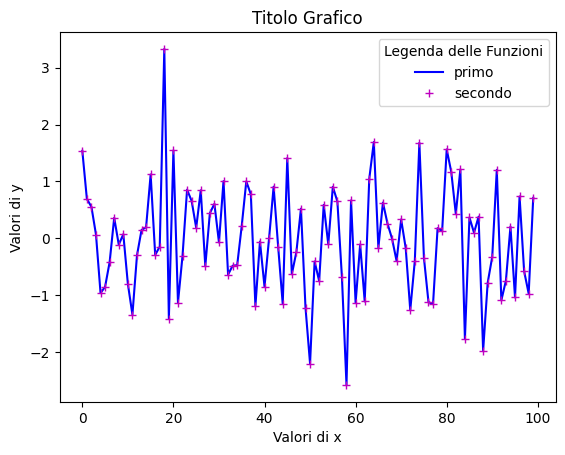

In [25]:
# innanzitutto assicurarsi di avere importato matplotlib, ad esempio con 
# il comando "import matplotlib.pyplot as plt" presente all'inizio di 
# questo notebook.
# Ora, c'è una sequenza obbligata di comandi per creare un grafico:

# creare la figura, eventualmente assegnandole un numero identificativo:
plt.figure()

v = np.random.randn(100)
# creare il grafico, da uno o più vettori NumPy:
plt.plot(v,'b-') # in questo caso le ascisse sono implicitamente date 
                 # dagli indici del vettore "v"
plt.plot(range(len(v)),v,'m+') # stessa cosa, ma qui le ascisse sono date
                 # esplicitamente
plt.title("Titolo Grafico")
plt.xlabel('Valori di x')
plt.ylabel('Valori di y')
plt.legend(['primo','secondo'],title='Legenda delle Funzioni')

#plt.show()   # mostra a video i grafici definiti nella cella, NON necessario


### SUBPLOTS

[ 0.00000000e+00  1.27877162e-01  2.53654584e-01  3.75267005e-01
  4.90717552e-01  5.98110530e-01  6.95682551e-01  7.81831482e-01
  8.55142763e-01  9.14412623e-01  9.58667853e-01  9.87181783e-01
  9.99486216e-01  9.95379113e-01  9.74927912e-01  9.38468422e-01
  8.86599306e-01  8.20172255e-01  7.40277997e-01  6.48228395e-01
  5.45534901e-01  4.33883739e-01  3.15108218e-01  1.91158629e-01
  6.40702200e-02 -6.40702200e-02 -1.91158629e-01 -3.15108218e-01
 -4.33883739e-01 -5.45534901e-01 -6.48228395e-01 -7.40277997e-01
 -8.20172255e-01 -8.86599306e-01 -9.38468422e-01 -9.74927912e-01
 -9.95379113e-01 -9.99486216e-01 -9.87181783e-01 -9.58667853e-01
 -9.14412623e-01 -8.55142763e-01 -7.81831482e-01 -6.95682551e-01
 -5.98110530e-01 -4.90717552e-01 -3.75267005e-01 -2.53654584e-01
 -1.27877162e-01 -2.44929360e-16]


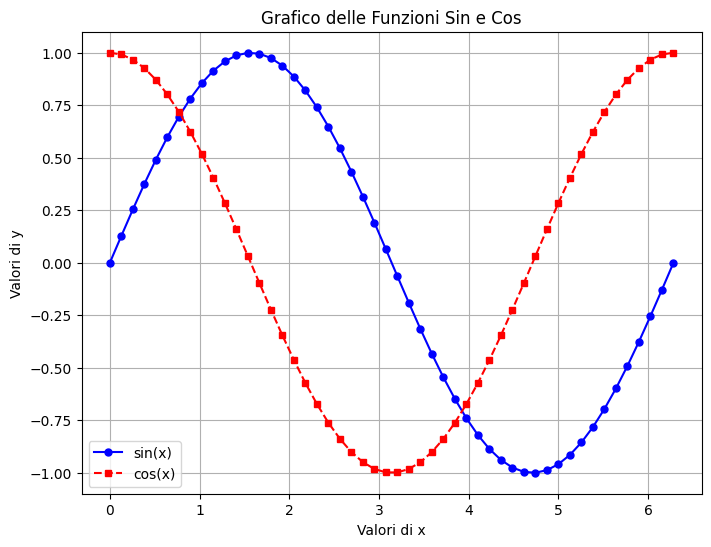

In [33]:
x = np.linspace(0, 2*np.pi, 50)
y1 = np.sin(x)
print(y1)
y2 = np.cos(x)

# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Plot delle serie di dati con etichette e colori personalizzati
ax.plot(x, y1, color='blue', linestyle='-', marker='o', markersize=5, label='sin(x)')
ax.plot(x, y2, color='red', linestyle='--', marker='s', markersize=5, label='cos(x)')

# Titolo e etichette degli assi
ax.set_title('Grafico delle Funzioni Sin e Cos')
ax.set_xlabel('Valori di x')
ax.set_ylabel('Valori di y')

# Aggiunta di una legenda
ax.legend()

# Aggiunta della griglia
ax.grid(True)

# Mostra il grafico
plt.show()


# Grafici 3D

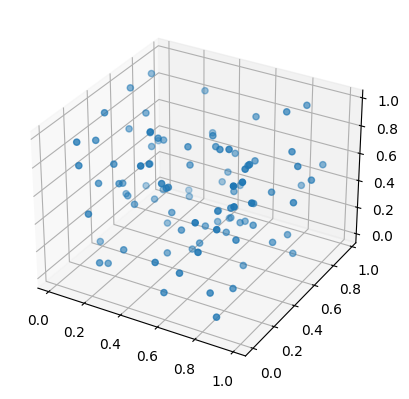

In [35]:
# anche i grafici tri-dimensionali sono relativamente semplici da creare:

# nuvole di punti:
P = np.random.rand(3,100)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(P[0,:],P[1,:],P[2,:])


Z=
 [[ 1.00000000e+00  9.68583161e-01  8.76306680e-01 ...  5.35826795e-01
   3.09016994e-01  6.27905195e-02]
 [ 9.87688341e-01  9.56658295e-01  8.65517891e-01 ...  5.29229878e-01
   3.05212482e-01  6.20174640e-02]
 [ 9.51056516e-01  9.21177327e-01  8.33417178e-01 ...  5.09601565e-01
   2.93892626e-01  5.97173328e-02]
 ...
 [-1.56434465e-01 -1.51519789e-01 -1.37084567e-01 ... -8.38217780e-02
  -4.83409082e-02 -9.82260133e-03]
 [-1.83697020e-16 -1.77925840e-16 -1.60974926e-16 ... -9.84297854e-17
  -5.67655010e-17 -1.15344313e-17]
 [ 1.56434465e-01  1.51519789e-01  1.37084567e-01 ...  8.38217780e-02
   4.83409082e-02  9.82260133e-03]]


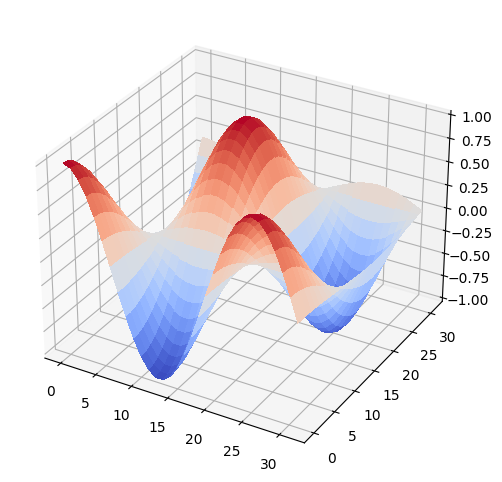

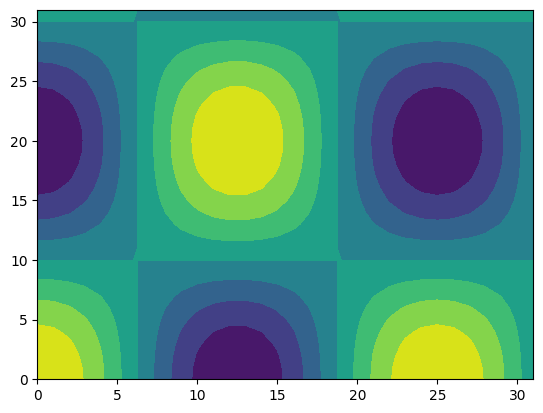

In [39]:
# superficie in R^3:
Nx = 32
Ny = 32
omega_nu_x = (2*np.pi/Nx) * 0.08*(Nx/2.) #frequenza spaziale
omega_nu_y = (2*np.pi/Ny) * 0.05*(Ny/2.) #frequenza spaziale
X,Y = np.meshgrid(np.arange(Nx),np.arange(Ny))
#print(np.meshgrid(np.arange(Nx),np.arange(Ny)))
#Z = b.reshape((Ny,Nx))
Z = np.atleast_2d(np.cos(omega_nu_y*np.arange(Ny))).T @ np.atleast_2d(np.cos(omega_nu_x*np.arange(Nx)))

print("Z=\n", Z)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
fobj2 = ax.plot_surface(X, Y, Z, linewidth=0, cmap=plt.cm.coolwarm, antialiased=False)

# stessa cosa con mappa di colori:
plt.figure(3)
plt.contourf(np.array(Z))

plt.show()

Consulta la documentazione online di matplotlib per ulteriori dettagli e numerose ulteriori funzionalità di questa corposa libreria grafica:
https://matplotlib.org

NB: l'uso delle librerie complesse come la matplotlib può risultare complicato o reso difficile da problemi (talvolta in sè anche banali) che spesso si manifestano con un messaggio di errore. Si consiglia di consultare le risposte della community digitando su un motore di ricerca (es. google) una domanda o il messaggio di errore stesso. Molto spesso tali problemi sono già stati affrontati, le risposte sono state scritte su qualche blog ed il motore di ricerca le trova.

### Esercizio
Simuliamo un semplice random walk 1-dimensionale di 100 steps
poi troviamone 
- il minimo e il massimo
- il numero massimo consecutivo di step positivi e il numero massimo consecutivo di step negativi
- creiamo anche un array booleano in cui ho True se ho fatto un passo positivo e false se ne ho fatto uno negativo

massimo:  1
minimo:  -16


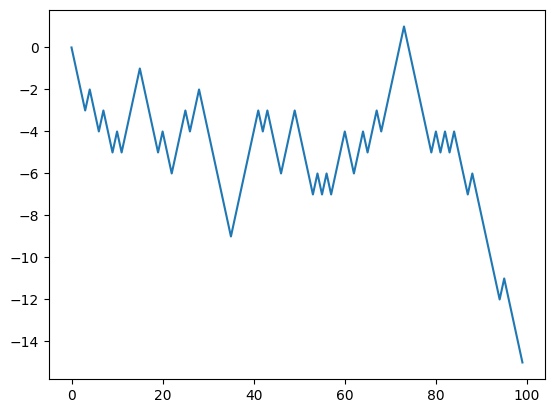

In [62]:
pos=0
walk=[pos]
nsteps=100
for _ in np.arange(nsteps):
    if np.random.randint(0,2):
        pos += 1
    else:
        pos -= 1

    walk.append(pos)

plt.plot(walk[0:100])
print("massimo: ", max(walk))
print("minimo: ", min(walk))
max_N_up = 0
max_N_down = 0
corrente = 1

for i in np.arange(1,len(walk)):
    if walk[i]==walk[i-1]:
        corrente+=1
    else: 
        corrente = 1

    if walk[i]==1 and corrente>max_N_up:
        max_N_up = corrente
    elif walk[i]==-1 and corrente>max_N_down:
        max_N_down = corrente


In [65]:
steps = np.random.choice([1,-1], size=100)
steps>0

array([ True, False, False, False,  True,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True,  True, False,
        True, False, False,  True, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True])